In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day11\nutrient.csv", index_col =0)
df.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [4]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)

In [5]:
#using Kmeans
Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i, random_state=24)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on

Best no. of clusters: 2
Best Score: 0.44834235285877894


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
clust = KMeans(n_clusters=Ks[i_max], random_state=24)
clust.fit(df_scaled)
clust_data=df.copy()
clust_data['Clust'] = clust.labels_
clust_data.groupby('Clust').mean()

C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,energy,protein,fat,calcium,iron
Clust,,,,,
0,219.4,19.8,14.48,41.24,2.116
1,57.5,9.0,1.00,78.00,5.700


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\

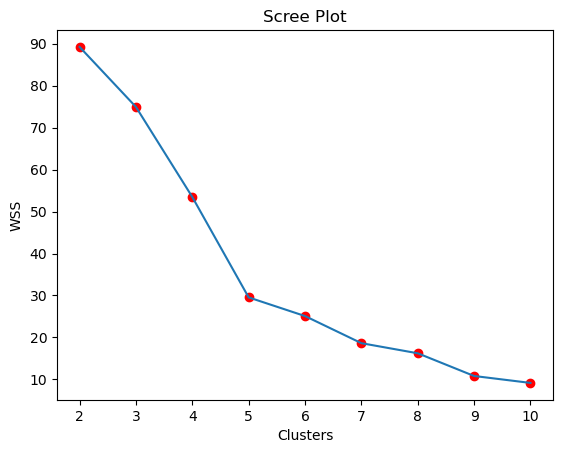

In [7]:
Ks = [2,3,4,5,6,7,8,9,10]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(clust.inertia_)
plt.scatter(Ks, scores, c='red')
plt.plot(Ks, scores)
plt.title("Scree Plot")
plt.xlabel("Clusters")
plt.ylabel("WSS")
plt.show()